<a href="https://colab.research.google.com/github/audrb1999/Python_image/blob/main/git_hub3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***7. Contuour로 사각형 외각 찾기!***

> cv2.boundingRect(contour) : 사각형의 x, y 좌표와 너비 높이를 반환합니다.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving digit_image.png to digit_image (1).png


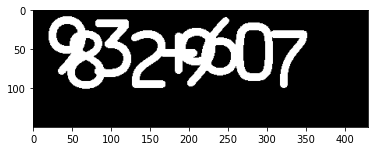

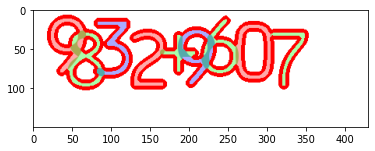

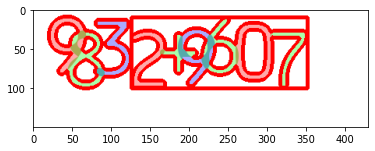

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]#글자는 색이 있어서 검은색 배경은 하얀색(원래 하얀색) 이 됨!
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)# 그래서 그 값을 역전 시켜줌!  > 색 간격들을 빨간색으로 감쌈


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]#이 인덱스 값에 따라 사각형 그려줌
x, y, w, h = cv2.boundingRect(contour)#첫번째에 대해서 네모 박스침
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

- curve: Contour
- epsilon: 최대 거리 (클수록 Point 개수 감소)
- closed: 폐곡선 여부

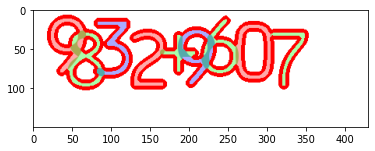

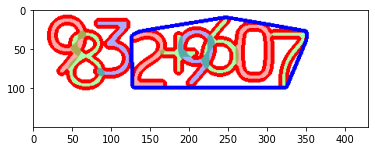

In [7]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contour = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contour, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

hull = cv2.convexHull(contour[0])
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

- curve: Contour
- epsilon: 최대 거리 (클수록 Point 개수 감소)
- closed: 폐곡선 여부

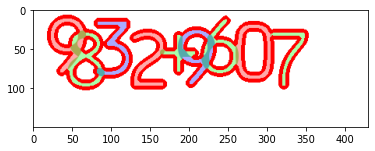

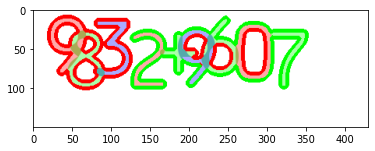

In [8]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
epsilon = 0.0001 * cv2.arcLength(contour, True)# 값이 작아질 수록 완전하게 컨투어를 따라감
approx = cv2.approxPolyDP(contour, epsilon, True)# 컨투어를 유사 다각형을 만듬!
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}
9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.968198

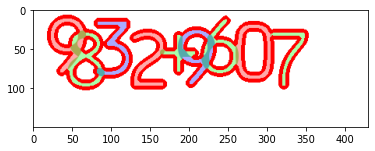

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)# 넓이를 추출contour = contours[0]
area = cv2.contourArea(contour)# 넓이를 추출
print(area)

length = cv2.arcLength(contour, True)
print(length)#넓이

M = cv2.moments(contour)#특징 추출
print(M)

print(area)

length = cv2.arcLength(contour, True)
print(length)

M = cv2.moments(contour)#특징 추출
print(M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

이미지 안에서 특정한 사물을 테두리를 얻고자 하자면 컨투어를 사용하자